In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [98]:
#importar bibliotecas, utilizando abreviações para chama-las no decorrer do código
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Leitura do arquivo csv
df = pd.read_csv("cuidadosdesaude_noshows.csv")

In [4]:
#exibe as linhas da tabela solicitado dentro do parênteses
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [6]:
#leitura das quantidades de linhas e colunas (boa prática)
df.shape

(106987, 15)

In [7]:
#backup salva os dados neste momento sem os tratamento, sem alteração em uma variável
df_backup = df.copy()

In [8]:
#Contar dados nulos em cada coluna isnull conta e o sum soma, aqui considera em y, colunas
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [9]:
#Contar dados nulos por linhas axis=1 indica que a contagem será por linhas, só tem a opção de true e false, 0 e 1
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0         0
1         0
2         0
3         0
4         0
         ..
106982    0
106983    0
106984    0
106985    0
106986    0
Length: 106987, dtype: int64


In [10]:
#descrição dos dados matemáticos(conta, média, desvio- padrão, minimo,...)
df.describe()

,PatientId,AppointmentID,Age,Date.diff
count,1.069870e+05,1.069870e+05,106987.000000,106987.000000
mean,1.472814e+14,5.675434e+06,38.316085,10.166721
std,2.558267e+14,7.133274e+04,22.466214,15.263508
min,3.921784e+04,5.030230e+06,1.000000,-6.000000
25%,4.173523e+12,5.640490e+06,19.000000,0.000000
50%,3.172463e+13,5.680744e+06,38.000000,4.000000
75%,9.433600e+13,5.725634e+06,56.000000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,179.000000


In [11]:
#Verificação das informações, um resumo das principais informações do DF, salvas no DF original
info_df = df.info()
print(info_df)
# RangeIndex: Indica o tipo de índice do DF (neste caso, um índice numérico)
# Quantidade total de colunas, lista com os nomes das colunas, o tipo de dado armazenado, quant de memória e quantos valores esão preenchidos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB
None


In [12]:
#Remover linhas duplicadas, mas tem outra opção da aula passada 
df = df.drop_duplicates() #salva a informação de exclução dentro desta variável, apaga
# Cria um novo DF com as duplicatas removidas. 
# O DF original permanece inalterado.
# É necessário atribuir o resultado a uma nova variável (neste caso, df) para usar o DF modificado.

In [13]:
#confirmar as alterações da remoção das linhas duplicadas, equivalente ao inplace 
df.shape

(106987, 15)

In [14]:
#Resertar index (true irá apagar, só teste pois n tem na planilha
df = df.reset_index(drop=False)
# resert: redefine o índice do DF, atribuindo-lhe uma sequência numérica contínua começando de 0.
# É útil quando você precisa trabalhar com um índice numérico simples e contínuo em um DataFrame.
# Ela é frequentemente usada antes de operações que dependem de um índice numérico, como o acesso a elementos por localização ou o agrupamento.
# Ao usar drop=True, você evita a criação de uma coluna adicional que pode ser desnecessária.

In [15]:
df.head()

,index,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [16]:
#Renomear as Colunas
df.rename(columns={ 
    'index': 'Id', 
    'PatientId': 'Id_Paciente', 
    'AppointmentID': 'Id_Consulta', 
    'Gender': 'Gênero', 
    'ScheduledDay': 'Dia_Agendamento', 
    'AppointmentDay': 'Dia_Consulta', 
    'Age': 'Idade',
    'Neighbourhood': 'Cidade', 
    'Scholarship': 'Bolsa_Estudo', 
    'Hipertension': 'Hipertensão',
    'Diabetes': 'Diabetes',
    'Alcoholism': 'Alcoolismo',
    'Handcap': 'Deficiente',
    'SMS_received': 'SMS_recebido',
    'Showed_up': 'Recebido_up',
    'Date.diff': 'Data_diff'
    }, inplace=True)

In [17]:
df.shape

(106987, 16)

In [18]:
df.columns #verificar os nomes das colunas p a próxima etapa

Index(['Id', 'Id_Paciente', 'Id_Consulta', 'Gênero', 'Dia_Agendamento',
       'Dia_Consulta', 'Idade', 'Cidade', 'Bolsa_Estudo', 'Hipertensão',
       'Diabetes', 'Alcoolismo', 'Deficiente', 'SMS_recebido', 'Recebido_up',
       'Data_diff'],
      dtype='object')

In [20]:
#Apagar colunas no DF
df = df.drop(columns=["Bolsa_Estudo", "SMS_recebido", "Recebido_up", "Data_diff"])

In [21]:
df.head(10)

,Id,Id_Paciente,Id_Consulta,Gênero,Dia_Agendamento,Dia_Consulta,Idade,Cidade,Hipertensão,Diabetes,Alcoolismo,Deficiente
0,0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,True,False,False,False
1,1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False
2,2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False
3,3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False
4,4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,True,True,False,False
5,5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,True,False,False,False
6,6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False
7,7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False
8,8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False
9,9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False


In [23]:
# Convertendo a coluna 'Dia_Agendamento' para o formato datetime, depois pode usar o método dt.strftime() para formatar a data para a saída desejada
df["Dia_Agendamento"] = pd.to_datetime(df["Dia_Agendamento"], format="mixed")
df['Dia_Agendamento'] = df['Dia_Agendamento'].dt.strftime('%d/%m/%Y') # Convertendo o formato da data para Dia/Mês/Ano)
print(df['Dia_Agendamento'])


0         29/04/2016
1         29/04/2016
2         29/04/2016
3         29/04/2016
4         29/04/2016
             ...    
106982    03/05/2016
106983    03/05/2016
106984    27/04/2016
106985    27/04/2016
106986    27/04/2016
Name: Dia_Agendamento, Length: 106987, dtype: object


In [25]:
# Convertendo a coluna 'Dia_Consulta' para o formato datetime, depois pode usar o método dt.strftime() para formatar a data para a saída desejada
df['Dia_Consulta'] = pd.to_datetime(df['Dia_Consulta'], format="mixed")
df['Dia_Consulta'] = df['Dia_Consulta'].dt.strftime('%d/%m/%Y') # Convertendo o formato da data para Dia/Mês/Ano)
print(df['Dia_Consulta'])


0         29/04/2016
1         29/04/2016
2         29/04/2016
3         29/04/2016
4         29/04/2016
             ...    
106982    07/06/2016
106983    07/06/2016
106984    07/06/2016
106985    07/06/2016
106986    07/06/2016
Name: Dia_Consulta, Length: 106987, dtype: object


In [27]:
df.head(10)

,Id,Id_Paciente,Id_Consulta,Gênero,Dia_Agendamento,Dia_Consulta,Idade,Cidade,Hipertensão,Diabetes,Alcoolismo,Deficiente
0,0,2.987250e+13,5642903,F,29/04/2016,29/04/2016,62,JARDIM DA PENHA,True,False,False,False
1,1,5.589978e+14,5642503,M,29/04/2016,29/04/2016,56,JARDIM DA PENHA,False,False,False,False
2,2,4.262962e+12,5642549,F,29/04/2016,29/04/2016,62,MATA DA PRAIA,False,False,False,False
3,3,8.679512e+11,5642828,F,29/04/2016,29/04/2016,8,PONTAL DE CAMBURI,False,False,False,False
4,4,8.841186e+12,5642494,F,29/04/2016,29/04/2016,56,JARDIM DA PENHA,True,True,False,False
5,5,9.598513e+13,5626772,F,27/04/2016,29/04/2016,76,REPÚBLICA,True,False,False,False
6,6,7.336882e+14,5630279,F,27/04/2016,29/04/2016,23,GOIABEIRAS,False,False,False,False
7,7,3.449833e+12,5630575,F,27/04/2016,29/04/2016,39,GOIABEIRAS,False,False,False,False
8,8,5.639473e+13,5638447,F,29/04/2016,29/04/2016,21,ANDORINHAS,False,False,False,False
9,9,7.812456e+13,5629123,F,27/04/2016,29/04/2016,19,CONQUISTA,False,False,False,False


In [28]:
#Salvar no CSV - 
df.to_csv("cuidadosdesaude_tratado.csv", index=False)

Análises

C:\Users\flavi_000\AppData\Local\Temp\ipykernel_5172\163092064.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_por_faixa = df.groupby('Faixa_Etaria')['Dia_Consulta'].count()


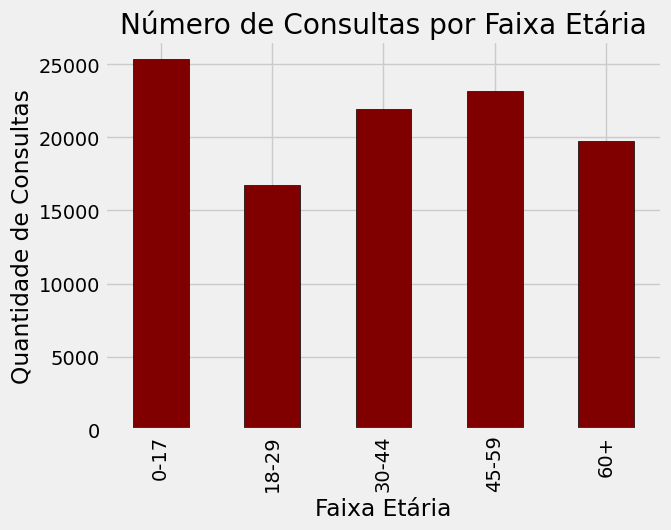

In [77]:
#Qual a faixa de idade que marcaram consultas?

# Definindo listas com os limites de cada faixa etária e seus rótulos
faixas_etarias = [0, 18, 30, 45, 60, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60+'] 

# Criando uma nova coluna com as faixas etárias, bins define os limites das faixas
df['Faixa_Etaria'] = pd.cut(df['Idade'], bins=faixas_etarias, labels=labels)

# Agrupando os dados por faixa etária e contando as consultas
contagem_por_faixa = df.groupby('Faixa_Etaria')['Dia_Consulta'].count()

# Criando o gráfico de barras
contagem_por_faixa.plot(kind='bar', color='maroon', edgecolor='black')

# Configurando o gráfico
plt.title('Número de Consultas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Consultas')

plt.show()

# df.groupby('Faixa_Etaria'): Agrupa os dados do DataFrame por 'Faixa_Etaria'.
# ['Dia_Consulta'].count(): Conta a quantidade de valores não-nulos na coluna 'Dia_Consulta' para cada grupo (faixa etária).
# contagem_por_faixa: Armazena o resultado em uma nova série, onde o índice são as faixas etárias e os valores são as contagens de consultas.



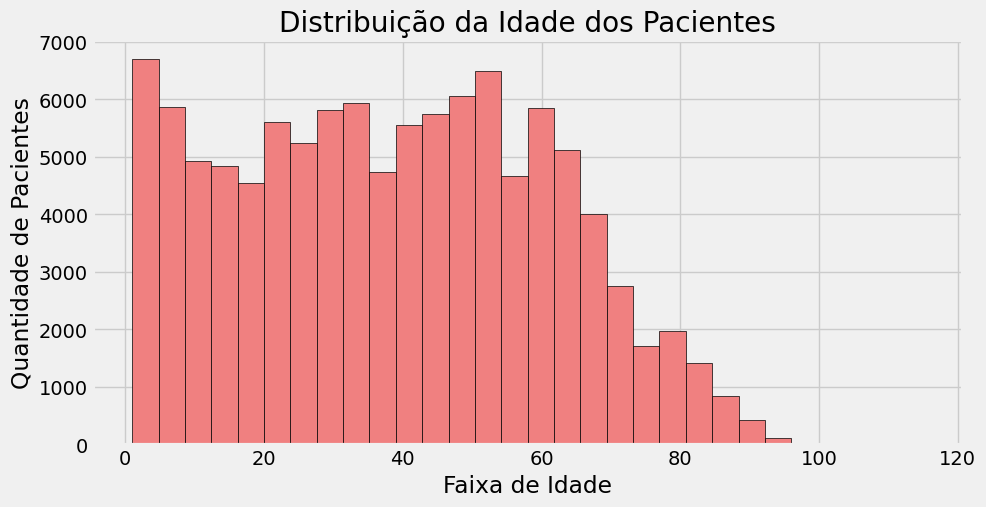

In [104]:
# Qual a faixa de idade dos pacientes?

 # Criando gráfico no formato de histograma
df[['Idade']].hist(bins=30, figsize=(10, 5), color = 'lightcoral', edgecolor='black')
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Faixa de Idade')
plt.ylabel('Quantidade de Pacientes')
plt.show()

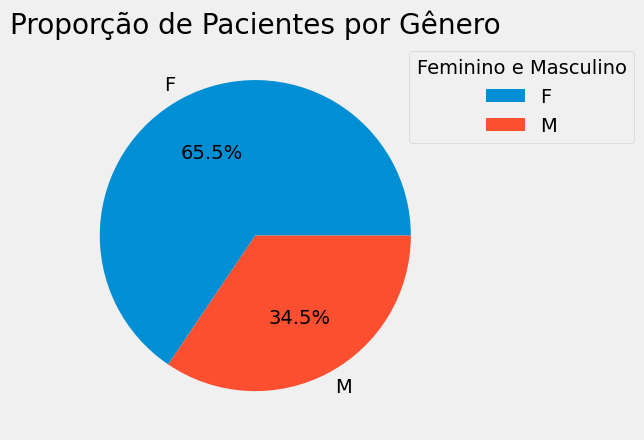

In [101]:
# Qual a taxa de pacientes por gênero ?

# Agrupando os dados por gênero e contando a quantidade de pacientes
contagem_por_genero = df.groupby('Gênero').size() #contar o número de linhas em cada grupo

#criando gáfico de pizza
contagem_por_genero.plot(kind='pie', autopct='%1.1f%%')
#plt.legend()
plt.legend(title= 'Feminino e Masculino',loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.title('Proporção de Pacientes por Gênero')
plt.show()


TESTES

In [109]:
pip install scipy

In [119]:
import scipy.stats as stats

Teste 
A  idade média das pessoas com diabetes é diferente da idade média das pessoas sem diabetes? 

A idade média das pessoas com diabetes é significativamente diferente da idade média das pessoas sem diabetes.


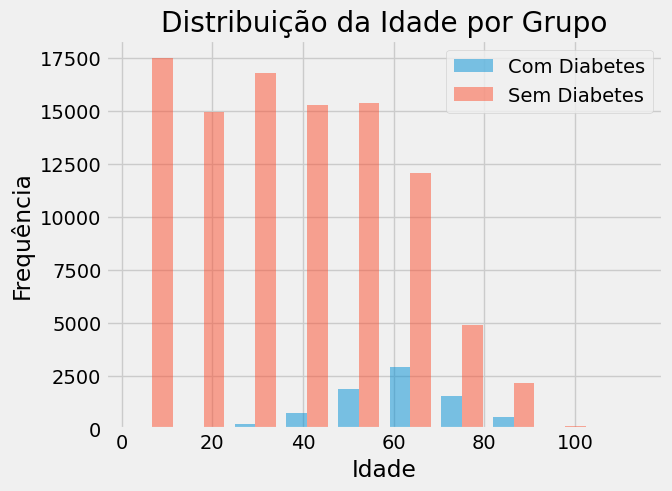

In [138]:
# Criando DF para cada situação:
grupo_positivo = df[df['Diabetes'] == True]['Idade']
grupo_negativo = df[df['Diabetes'] == False]['Idade']

#Teste t:
t_stat, p_value = stats.ttest_ind(grupo_positivo, grupo_negativo)

# Interpretando o resultado
if p_value < 0.05:
    print("A idade média das pessoas com diabetes é significativamente diferente da idade média das pessoas sem diabetes.")
else:
    print("Não há evidência suficiente para concluir que a idade média das pessoas com diabetes é diferente.")

#Gráfico
plt.hist([grupo_positivo, grupo_negativo], bins=10, label=['Com Diabetes', 'Sem Diabetes'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição da Idade por Grupo')
plt.legend()
plt.show()


Testando a Hipótese 2
Comparando a proporção de homens com diabetes e mulheres com diabetes

Teste T de diabetes
Estatística T : 0.3559935645975703
Valor P: 0.7218548413322965
Existe uma associação significativa entre gênero e diabetes.


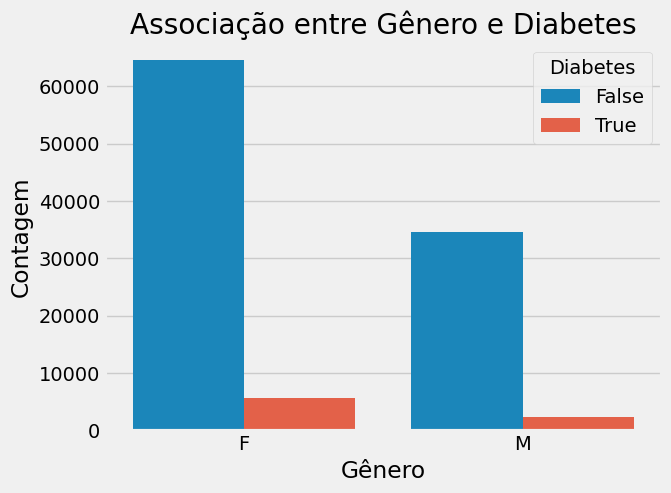

In [141]:
# Criando uma tabela de contingência
tabela_contigencia = pd.crosstab(df['Gênero'], df['Diabetes'])

# Realizando o teste de qui-quadrado
chi2, p, dof, expected = stats.chi2_contingency(tabela_contigencia)

# Teste t
estatistica_t, valor_p = stats.ttest_ind(mulheres_diabetes['Idade'], homens_diabetes['Idade'])

print("Teste T de diabetes")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")

# Interpretando o resultado
if p < 0.05:
    print("Existe uma associação significativa entre gênero e diabetes.")
else:
    print("Não há evidência suficiente para concluir que existe uma associação entre gênero e diabetes.")

#Gráfico utilizando o Seaborn para uma visualização mais elegante
sns.countplot(x='Gênero', hue='Diabetes', data=df)
plt.title('Associação entre Gênero e Diabetes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Diabetes')
plt.show()

Amostra e SQL

In [147]:
amostra2_df = df.sample(100)

In [153]:
amostra2_df.head()

,Id,Id_Paciente,Id_Consulta,Gênero,Dia_Agendamento,Dia_Consulta,Idade,Cidade,Hipertensão,Diabetes,Alcoolismo,Deficiente,Faixa_Etaria
23284,23284,6.493464e+10,5710321,F,17/05/2016,17/05/2016,3,SANTA MARTHA,False,False,False,False,0-17
58351,58351,3.136369e+12,5719976,M,19/05/2016,20/05/2016,69,CARATOÍRA,True,False,False,False,60+
45950,45950,3.424769e+14,5608479,M,20/04/2016,11/05/2016,70,MARUÍPE,False,False,False,False,60+
26681,26681,3.112342e+13,5716702,F,19/05/2016,19/05/2016,60,SÃO CRISTÓVÃO,True,True,False,False,45-59
1040,1040,4.792420e+13,5595465,M,18/04/2016,29/04/2016,2,SÃO JOSÉ,False,False,False,False,0-17


In [149]:
amostra2_df.shape #conferindo o número de linhas e colunas

(100, 13)

SQLITE3

In [155]:
import sqlite3

In [159]:
#Manipular uma consulta (Carrie) de SQL no pandas
# conexão 
conn = sqlite3.connect(':memory:')

#escrever o df em uma tabela sql
amostra2_df.to_sql('amostra2_df', conn, index=False, if_exists='replace') 

#executar a consulta 
query_sql = """
SELECT Gênero, COUNT(Hipertensão) AS Hipertensão
FROM amostra2_df
GROUP BY Gênero;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn) #nova variável que irá ler em pandas o SQL conn = conectar
print(contagem_por_gen)

#fechar a conexão
conn.close() #fechar a coneção

  Gênero  Hipertensão
0      F           67
1      M           33
